In [ ]:
##Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#importing iris data
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/iris.xlsx'

try:
    df_iris = pd.read_excel(file_path)
    print("Successfully loaded the Excel file:")
    display(df_iris.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
Successfully loaded the Excel file:


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Alternative way for loading the data as as dataframe
# from sklearn.datasets import load_iris
# iris_df = load_iris(as_frame=True)
# print(iris_df.frame.head()) # Access the DataFrame directly

#Importing from the data repo
#from ucimlrepo import fetch_ucirepo
# # fetch dataset
# iris = fetch_ucirepo(id=53)

# # data (as pandas dataframes)
# X = iris.data.features
# y = iris.data.targets

# # metadata
# print(iris.metadata)

# # variable information
# print(iris.variables)

In [ ]:
##cheking the dataset features
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0     sepal length in cm  150 non-null    float64
 1   sepal width in cm     150 non-null    float64
 2   petal length in cm    150 non-null    float64
 3   petal width in cm     150 non-null    float64
 4   class                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Exploratory Data Analysis

In [ ]:
## Descriptive statics
df_iris.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Rename columns for easier access
df_iris.rename(columns={'  sepal length in cm': 'sepal_length',
                        'sepal width in cm': 'sepal_width',
                        'petal length in cm': 'petal_length',
                        'petal width in cm': 'petal_width',
                        'class': 'species'}, inplace=True)

print("Columns renamed successfully:")
display(df_iris.head())

Columns renamed successfully:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


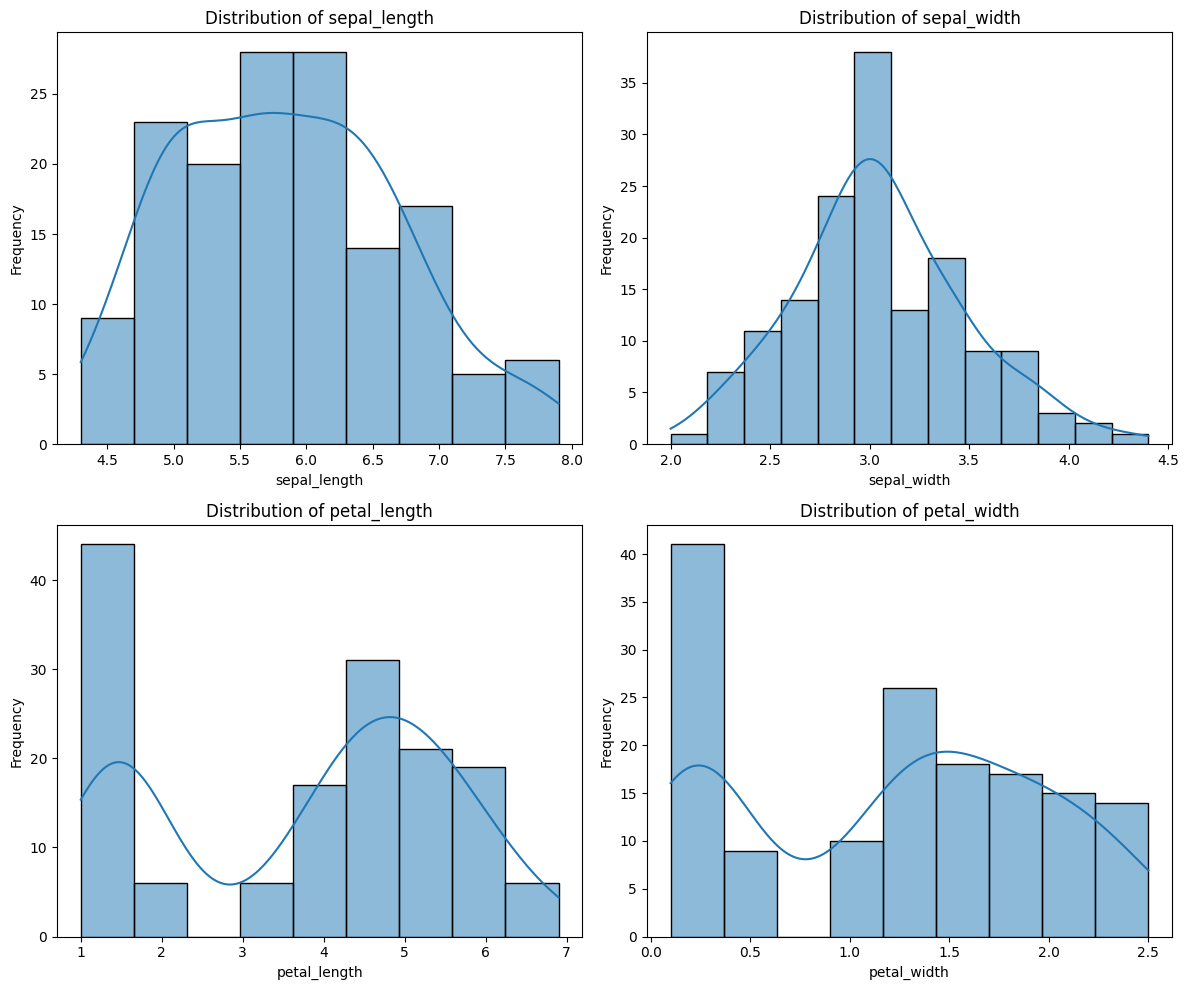

In [ ]:
## distirbution of numeric values
numeric_cols = df_iris.select_dtypes(include='number').columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numeric_cols):
  sns.histplot(data=df_iris, x=col, ax=axes[i], kde=True)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

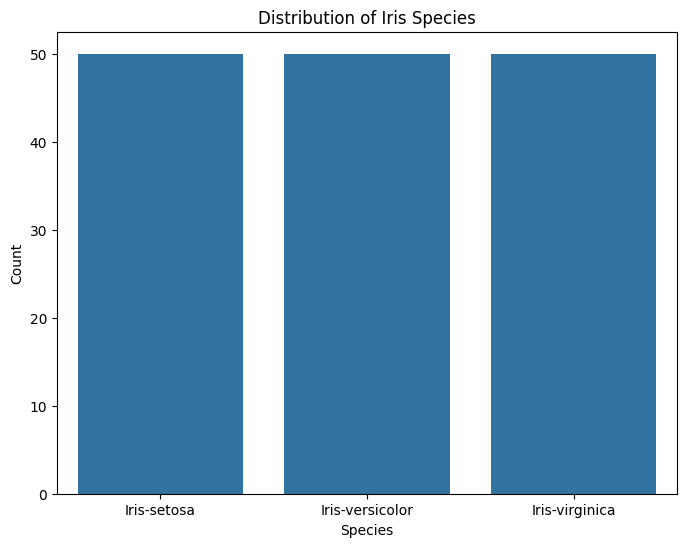

In [ ]:
## Univariate distribution of species
plt.figure(figsize=(8, 6))
sns.countplot(data=df_iris, x='species')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2448007686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Remove individual subplot legends
/tmp/ipython-input-2448007686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Remove individual subplot legends
/tmp/ipython-input-2448007686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove() # Remove individual subplot legends
/tmp/ipython-input-2448007686.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no ar

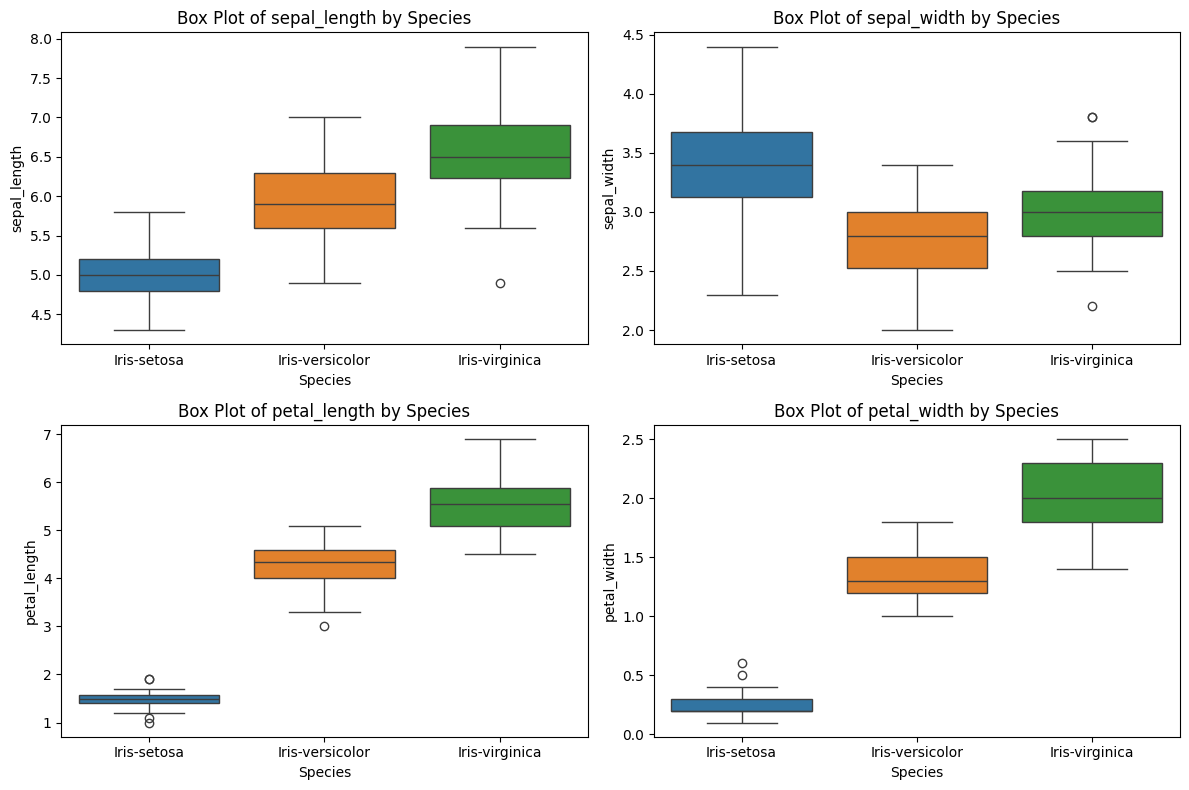

In [ ]:
## Box plots for numeric columns by species
numeric_cols = df_iris.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1) # Create subplots for each feature
    sns.boxplot(data=df_iris, x='species', y=col, hue='species')
    plt.title(f'Box Plot of {col} by Species')
    plt.xlabel('Species')
    plt.ylabel(col)
    plt.legend().remove() # Remove individual subplot legends

plt.tight_layout()
plt.show()

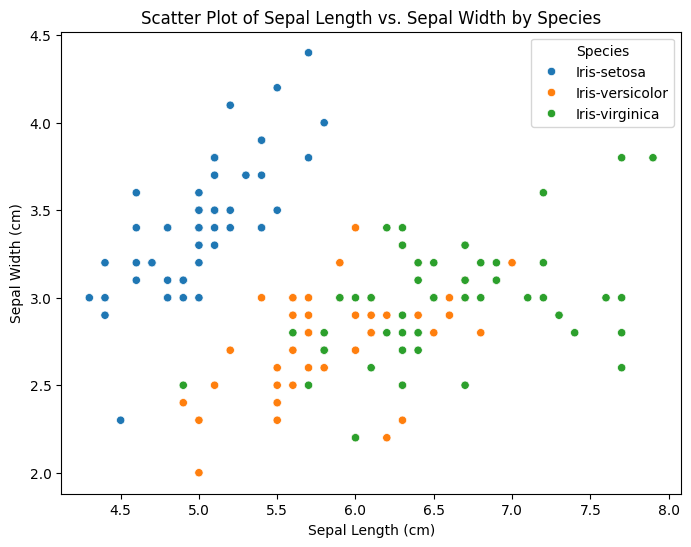

In [ ]:
## Scatter plot of two characteristics by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

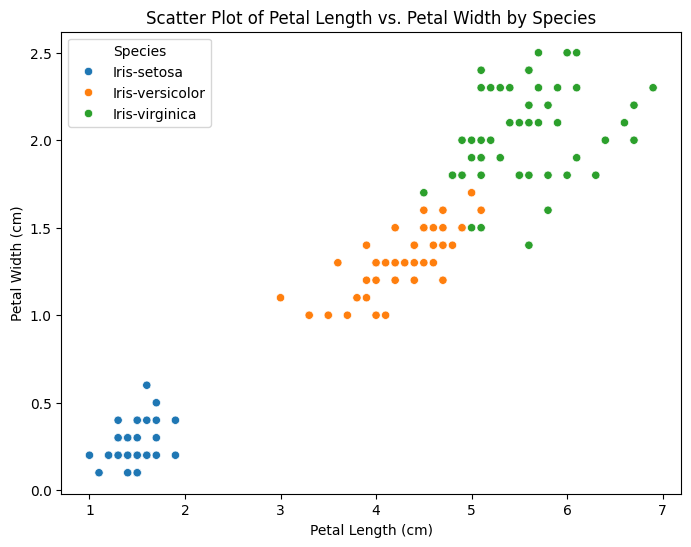

In [ ]:
## Scatter plot of two characteristics by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x='petal_length', y='petal_width', hue='species')
plt.title('Scatter Plot of Petal Length vs. Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

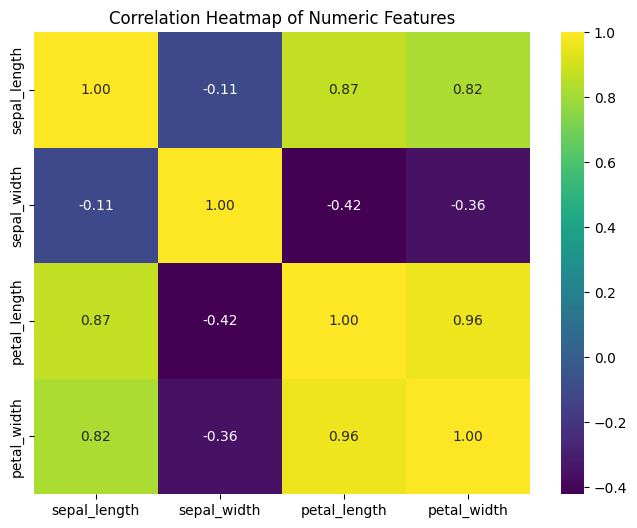

In [ ]:
## Correlation Heatmap
numeric_cols = df_iris.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
### Data cleaning
df_iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


#### Data Preprocessing

In [ ]:
##encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'species' column
df_iris['species_encoded'] = label_encoder.fit_transform(df_iris['species'])

print("Species column encoded successfully:")
display(df_iris.head())
display(df_iris['species_encoded'].value_counts())

Species column encoded successfully:


,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


,count
species_encoded,
0,50
1,50
2,50


In [ ]:
# Create a table of species and their encoded values
species_mapping = pd.DataFrame({
    'Original Species': label_encoder.classes_,
    'Encoded Value': label_encoder.transform(label_encoder.classes_)
})

print("Mapping of Species to Encoded Values:")
display(species_mapping)

Mapping of Species to Encoded Values:


,Original Species,Encoded Value
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [ ]:
#dropping the irrelevant column
df_iris.drop(columns=['species'], inplace=True)
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encoded'],
      dtype='object')

In [ ]:
## getting the dependent and independent data
x=df_iris.drop(columns=['species_encoded'])
y=df_iris['species_encoded']
#print the columns
print(x.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [ ]:
## Splitting the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


#### Model Training

In [ ]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train, y_train)

print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [ ]:
## Make predictions and evaluate the model
y_pred = decision_tree_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
# print("\nConfusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(class_report)

Accuracy: 1.00


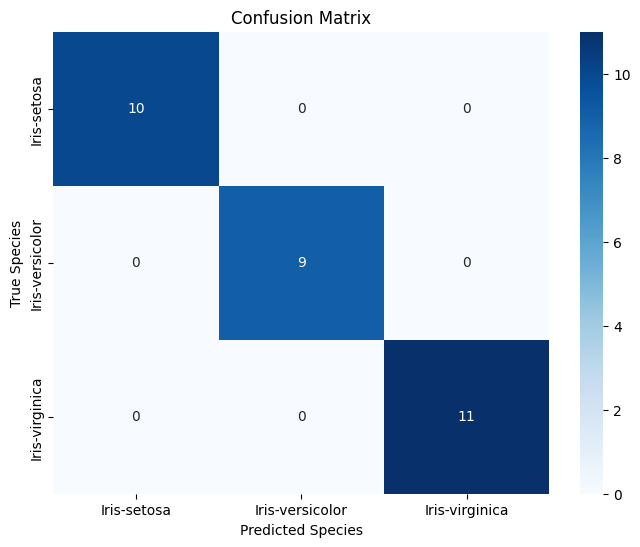


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(class_report)

Feature Importance:


,Feature,Importance
2,petal_length,0.906143
3,petal_width,0.077186
1,sepal_width,0.016670
0,sepal_length,0.000000


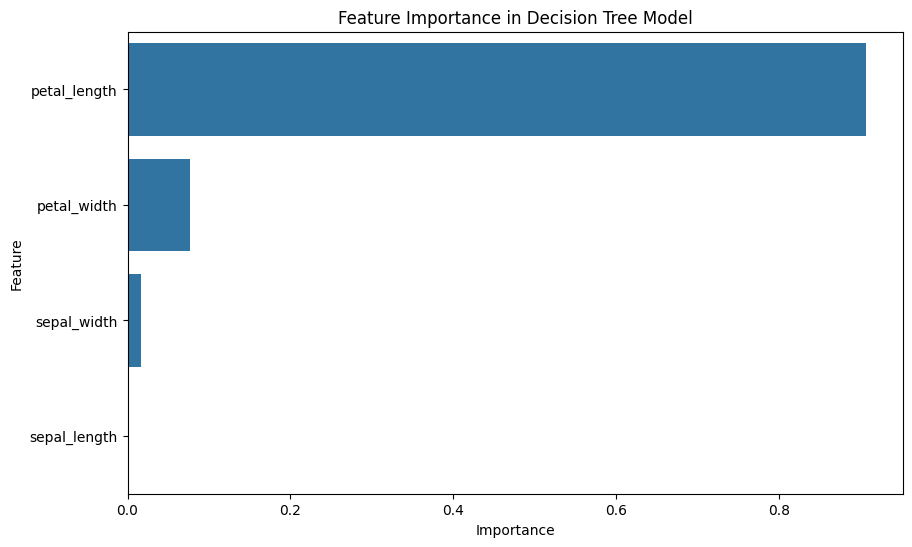

In [ ]:
## Check feature importance
feature_importance = decision_tree_model.feature_importances_

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
display(feature_importance_df)

# Optionally, visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

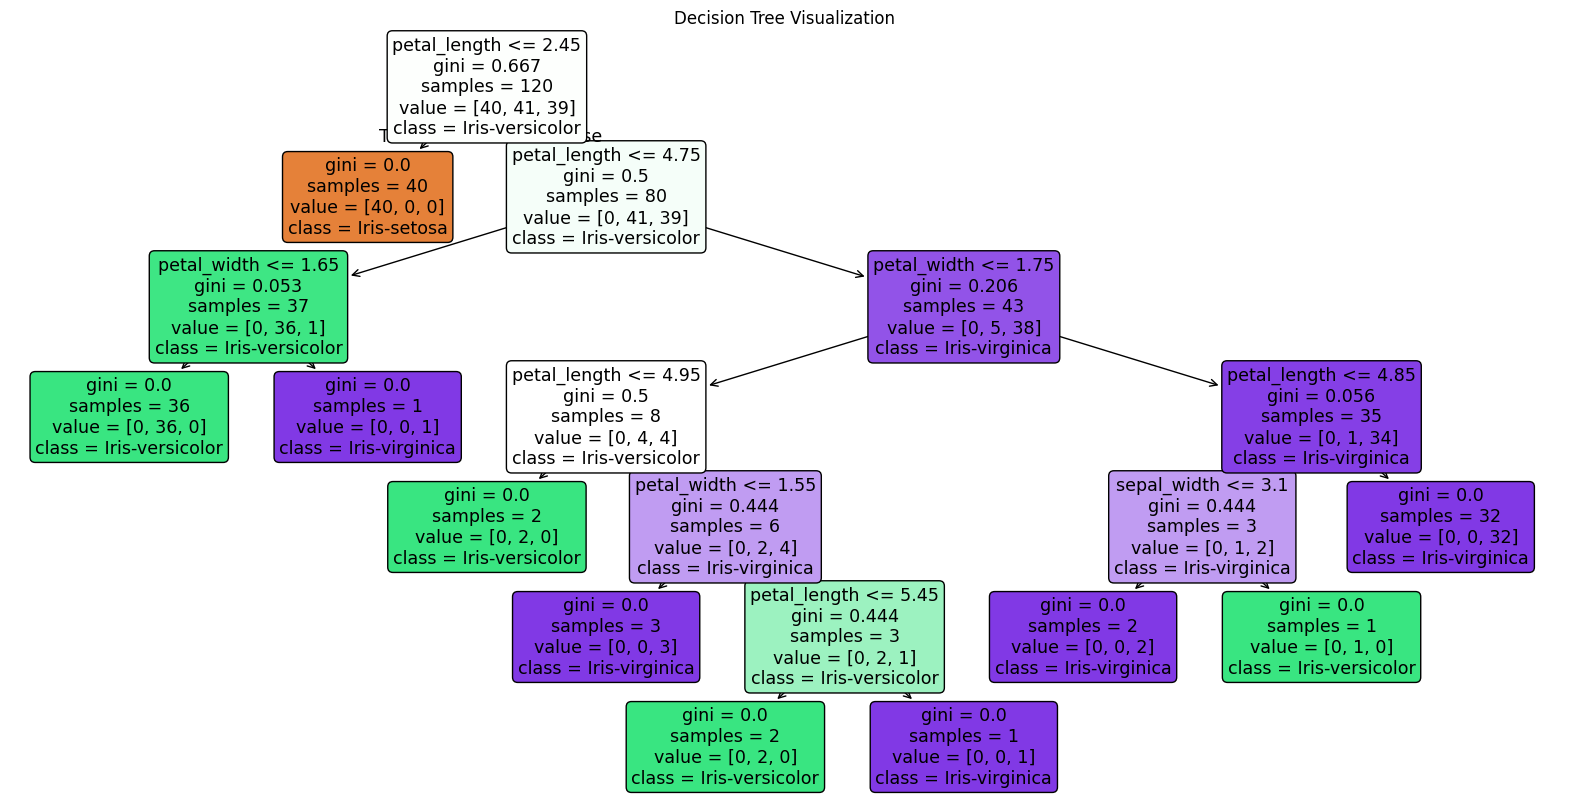

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model,
          feature_names=x.columns,
          class_names=label_encoder.classes_,
          filled=True,
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

In [ ]:
## Create dummy data for prediction
# The dummy data should have the same columns as the training data (x_train)
dummy_data = pd.DataFrame({
    'sepal_length': [5.5, 6.0, 7.0],
    'sepal_width': [3.0, 3.5, 3.0],
    'petal_length': [1.5, 4.0, 5.5],
    'petal_width': [0.2, 1.3, 2.0]
})

print("Dummy data created:")
display(dummy_data)

Dummy data created:


,sepal_length,sepal_width,petal_length,petal_width
0,5.5,3.0,1.5,0.2
1,6.0,3.5,4.0,1.3
2,7.0,3.0,5.5,2.0


In [ ]:
## Use the model to make predictions on the dummy data
dummy_predictions = decision_tree_model.predict(dummy_data)

# Decode the predictions back to species names using the label_encoder
predicted_species = label_encoder.inverse_transform(dummy_predictions)

print("Predictions for the dummy data:")
display(pd.DataFrame({'Predicted Species Encoded': dummy_predictions, 'Predicted Species': predicted_species}))

Predictions for the dummy data:


,Predicted Species Encoded,Predicted Species
0,0,Iris-setosa
1,1,Iris-versicolor
2,2,Iris-virginica


In [ ]:
# Add the predicted species to the dummy data DataFrame
dummy_data['Predicted Species'] = predicted_species

# Display the dummy data with the predicted species
print("Dummy data with predicted species:")
display(dummy_data.head())

Dummy data with predicted species:


,sepal_length,sepal_width,petal_length,petal_width,Predicted Species
0,5.5,3.0,1.5,0.2,Iris-setosa
1,6.0,3.5,4.0,1.3,Iris-versicolor
2,7.0,3.0,5.5,2.0,Iris-virginica


In [ ]:
import joblib

# Define the filename for the saved model
model_filename = 'decision_tree_model.joblib'

# Save the trained model to a file
joblib.dump(decision_tree_model, model_filename)

print(f"Model saved successfully to {model_filename}")

# --- Optional: Load the model back to verify ---
# loaded_model = joblib.load(model_filename)
# print("\nModel loaded successfully:")
# # You can now use the loaded_model to make predictions
# # loaded_predictions = loaded_model.predict(dummy_data)
# # print(loaded_predictions)